##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [ ]:
#%pip install pandas
#%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
filepath = "./data/catA_train.csv"
df2 = pd.read_csv(filepath)
df2.head(6)
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0
5,1.444773,103.812740,LAKB2BID2264578,SEMCO SALVAGE (V) PTE LTD,4959.0,"Sanitary Services, Not Elsewhere Classified",49590000.0,"Sanitary services, nec",1986.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,QUETZAL CAPITAL PTE. LTD.,Singapore,QUETZAL CAPITAL PTE. LTD.,0.0,0.0


### **ALL** Code for machine learning and dataset analysis should be entered below.
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

##Data Processing & EDA##

In [ ]:
# check for the number of missing values in the dataframe
df2.isna().sum()

LATITUDE                                  61
LONGITUDE                                 61
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               203
Entity Type                                1
Parent Company                           215
Parent Country                           219
Ownership Type                             1
Company Description                        1
Square Footage                         13322
Company Status (Active/Inactive)           1
Employees (Single Site)                 5674
Employees (Domestic Ultimate Total)       38
Employees (Global Ultimate Total)       1277
Sales (Domestic Ultimate Total USD)        1
Sales (Global Ultimate Total USD)          1
Import/Export Status                   10272
Fiscal Yea

In [ ]:
# show count, mean, std, and quintile information for each numerical column
df2.describe()

# Check for duplicates of company entries
df2["Company"].is_unique #true

True

In [ ]:
def Category(k):
    if k < 1000:
        return "Agriculture, Forestry & Fishing"
    elif 1000 <= k <= 1499:
        return "Mining"
    elif 1500 <= k <= 1799:
        return "Construction"
    elif 2000 <= k <= 3999:
        return "Manufacturing"
    elif 4000 <= k <= 4999:
        return "Transportation, Communications, Electric, Gas and Sanitary service"
    elif 5000 <= k <= 5199:
        return "Wholesale Trade"
    elif 5200 <= k <= 5999:
        return "Retail Trade"
    elif 6000 <= k <= 6799:
        return "Finance, Insurance and Real Estate"
    elif 7000 <= k <= 8999:
        return "Services"
    elif 9100 <= k <= 9729:
        return "Public Administration"
    elif 9900 <= k <= 9999:
        return "Nonclassifiable"


In [ ]:
# Remove rows where the Company Status is 'Inactive'
df2 = df2[df2['Company Status (Active/Inactive)'] == 'Active']

# Remove rows without lat & lon coordinates, domestic and global employee numbers, year found
df3 = df2.dropna(subset=["LATITUDE", "LONGITUDE", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)", "Year Found" ])

# Remove columns that are highly unlikely to impact sales number OR columns with highly incomplete data
columns_to_drop = ["AccountID", "Company", "Fiscal Year End", "Industry", "8-Digit SIC Code", "8-Digit SIC Description",
                   "Parent Company", "Company Description", "Square Footage", "Company Status (Active/Inactive)",
                   "Employees (Single Site)", "Import/Export Status", "Global Ultimate Company", "Domestic Ultimate Company"]

df3 = df3.drop(columns=[col for col in columns_to_drop if col in df3.columns], errors='ignore')

#Dropped "Industry", "8-Digit SIC Code", "8-Digit SIC Description" to prevent overclassification. The information would have
#been encoded in "SIC Code"

#"AccountID", "Company", "Fiscal Year End", "Parent Company", "Company Description","Global Ultimate Company",
#"Domestic Ultimate Company" are identification information which is not related to the sale figures

#Dropped "Square Footage" as NA for all rows, dropped "Company Status (Active/Inactive)" as all would be active

#Dropped "Employees (Single Site)" and "Import/Export Status" due to largely incomplete data
#Import/Exports will depend on the type of industry too and this is captured in "SIC Code"


## Columns left: LATITUDE, LONGITUDE, SIC Code, Year Found, Entity Type, Parent Country, Ownership Type, Employees (Domestic Ultimate Total),
##             Employees (Global Ultimate Total), Sales (Domestic Ultimate Total USD), Sales (Global Ultimate Total USD), Global Ultimate Country,
##             Is Domestic Ultimate, Is Global Ultimate)

#Encoding categorical variables
df3 = pd.get_dummies(df3, columns=['Entity Type'], prefix='Entity_Type')
df3 = pd.get_dummies(df3, columns=['Ownership Type'], prefix='Ownership_Type')

#Classify depending on whether parent company is based in SG
df3['Parent_Coun_Is_Singapore'] = df3['Parent Country'].apply(lambda x: 1 if x == 'Singapore' else 0)

#Classify depending on whether global ultimate country is in SG
df3['Glob_Ult_Coun_Is_Singapore'] = df3['Global Ultimate Country'].apply(lambda x: 1 if x == 'Singapore' else 0)

#Converting Year Found to Company Age
df3['Company Age']  = df3['Year Found'].apply(lambda x: 2024 - x)

# Drop the original 'Parent Country' , 'Global Ultimate Country' and 'Year Found' column
df3.drop('Parent Country', axis=1, inplace=True)
df3.drop('Global Ultimate Country', axis=1, inplace=True)
df3.drop('Year Found', axis=1, inplace=True)

#Categorize companies into different sectors based on SIC Code
df3['Category'] = df3['SIC Code'].apply(Category)

#df3.columns
df3.head(6)

,LATITUDE,LONGITUDE,SIC Code,Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate,Entity_Type_Branch,...,Ownership_Type_Non-Corporates,Ownership_Type_Nonprofit,Ownership_Type_Partnership,Ownership_Type_Private,Ownership_Type_Public,Ownership_Type_Public Sector,Parent_Coun_Is_Singapore,Glob_Ult_Coun_Is_Singapore,Company Age,Category
1,1.291294,103.827476,4449.0,100.0,100.0,7.093536e+09,7.093536e+09,0.0,0.0,0,...,0,0,0,1,0,0,1,1,9.0,"Transportation, Communications, Electric, Gas ..."
2,1.300144,103.857517,6719.0,4.0,4.0,1.026308e+06,1.026308e+06,1.0,0.0,0,...,0,0,0,1,0,0,0,0,31.0,"Finance, Insurance and Real Estate"
3,1.300785,103.791263,6719.0,100.0,100.0,7.339898e+10,7.339898e+10,0.0,0.0,0,...,0,0,0,1,0,0,1,1,18.0,"Finance, Insurance and Real Estate"
4,1.298759,103.859430,6719.0,4.0,4.0,4.322130e+05,4.322130e+05,1.0,1.0,0,...,0,0,0,1,0,0,1,1,18.0,"Finance, Insurance and Real Estate"
5,1.444773,103.812740,4959.0,4.0,4.0,1.026308e+06,1.026308e+06,0.0,0.0,0,...,0,0,0,1,0,0,1,1,38.0,"Transportation, Communications, Electric, Gas ..."
7,1.282887,103.850849,6719.0,4.0,4.0,1.026308e+06,1.026308e+06,0.0,0.0,0,...,0,0,0,1,0,0,1,1,14.0,"Finance, Insurance and Real Estate"


In [ ]:
sic_code_frequency = df3['SIC Code'].value_counts()
threshold = 10  # Adjust threshold
low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < threshold].index
df3['SIC Code'] = df3['SIC Code'].replace(low_frequency_sic_codes, 'Others')

sic_code_frequency1 = df3['SIC Code'].value_counts()
print(sic_code_frequency1)

df3['SIC Code'] = df3['SIC Code'].astype(str)

6719.0    3346
Others    1329
8742.0     547
7371.0     322
7389.0     280
          ... 
3827.0      10
5699.0      10
3841.0      10
5113.0      10
5141.0      10
Name: SIC Code, Length: 144, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df3['SIC Code'] = label_encoder.fit_transform(df3['SIC Code'])
df3["SIC Code"].unique()

array([ 32,  98, 143,   9, 119,  13, 100, 121,  83,  37, 108,  27, 140,
         2, 135,  97,  58,  74, 139, 141, 104,  65,  84, 114,  40,  56,
        26,  34,  44,  72,  60,  96, 127,  95,  29,  68,  59,  18,  48,
        93,  30,  28,  88, 117,  86,   8,  38,  36, 106, 134, 101, 137,
        66,  33, 105,  75,  14, 123, 113,  43,  46, 122,  76,  12,  41,
       110,  54,  20, 129,  50, 133,  31,  22,  49,  92, 103, 116,  80,
        23,   0,   4,   3,  99, 118,  57,  53,  87, 125, 131,  24, 138,
        82, 142, 109, 126,  61,  85,  73, 112,   1,   5, 102,  78,  52,
        39,  77,  64,  94, 132, 128,  16,   7,  79,  90,  45,  17,  42,
        81,  15,  21,  69,  71,  35, 130, 115,   6,  51,  67, 120,  89,
       107,  10, 136,  11,  70,  55,  62,  47,  25,  63,  19, 111, 124,
        91])

In [ ]:
##Correlation
numerical_df = df3.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df
#Our threshold for the absolute correlation coefficient is 0.01
#We will further look into the relationship between the variables and the sales figure below


,LATITUDE,LONGITUDE,SIC Code,Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate,Parent_Coun_Is_Singapore,Glob_Ult_Coun_Is_Singapore,Company Age
LATITUDE,1.000000,-0.048723,-0.084339,0.008885,-0.007211,-0.005073,-0.012276,-0.003101,-0.037555,-0.033659,-0.035634,0.025679
LONGITUDE,-0.048723,1.000000,0.031740,0.015898,0.003812,-0.013565,-0.001806,0.009014,0.014484,0.006767,0.003449,0.008750
SIC Code,-0.084339,0.031740,1.000000,0.010352,0.003575,-0.016738,-0.017578,0.019173,0.063796,0.046876,0.046733,-0.057746
Employees (Domestic Ultimate Total),0.008885,0.015898,0.010352,1.000000,0.018117,0.013423,0.009816,-0.046707,-0.044929,0.005509,-0.012782,0.035653
Employees (Global Ultimate Total),-0.007211,0.003812,0.003575,0.018117,1.000000,-0.002478,0.697722,0.086694,-0.099916,-0.230134,-0.273976,0.036896
Sales (Domestic Ultimate Total USD),-0.005073,-0.013565,-0.016738,0.013423,-0.002478,1.000000,0.095241,-0.052274,-0.041961,0.003195,-0.044708,-0.018324
Sales (Global Ultimate Total USD),-0.012276,-0.001806,-0.017578,0.009816,0.697722,0.095241,1.000000,0.072751,-0.103003,-0.207200,-0.241002,0.027146
Is Domestic Ultimate,-0.003101,0.009014,0.019173,-0.046707,0.086694,-0.052274,0.072751,1.000000,0.664174,-0.456155,-0.304829,-0.081261
Is Global Ultimate,-0.037555,0.014484,0.063796,-0.044929,-0.099916,-0.041961,-0.103003,0.664174,1.000000,0.292464,0.348814,-0.108397
Parent_Coun_Is_Singapore,-0.033659,0.006767,0.046876,0.005509,-0.230134,0.003195,-0.207200,-0.456155,0.292464,1.000000,0.853140,0.004997


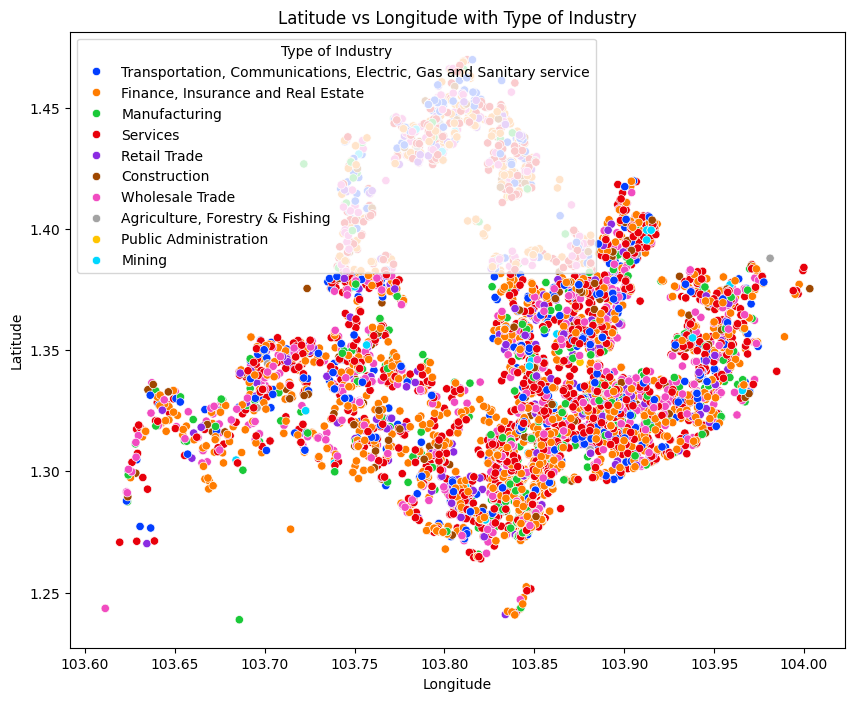

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

#Identify the distribution of the location of industries in SG
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='Category', data=df3, palette='bright')

plt.title('Latitude vs Longitude with Type of Industry')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Type of Industry')
plt.show()

#There is a high prevalence of companies in the "Finance, Insurance and Real Estate", "Services" and "Wholesale Trade" industries in SG.

###Scatterplots


In [ ]:
df3.columns

Index(['LATITUDE', 'LONGITUDE', 'SIC Code',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Is Domestic Ultimate',
       'Is Global Ultimate', 'Entity_Type_Branch', 'Entity_Type_Independent',
       'Entity_Type_Parent', 'Entity_Type_Subsidiary',
       'Ownership_Type_Non-Corporates', 'Ownership_Type_Nonprofit',
       'Ownership_Type_Partnership', 'Ownership_Type_Private',
       'Ownership_Type_Public', 'Ownership_Type_Public Sector',
       'Parent_Coun_Is_Singapore', 'Glob_Ult_Coun_Is_Singapore', 'Company Age',
       'Category'],
      dtype='object')

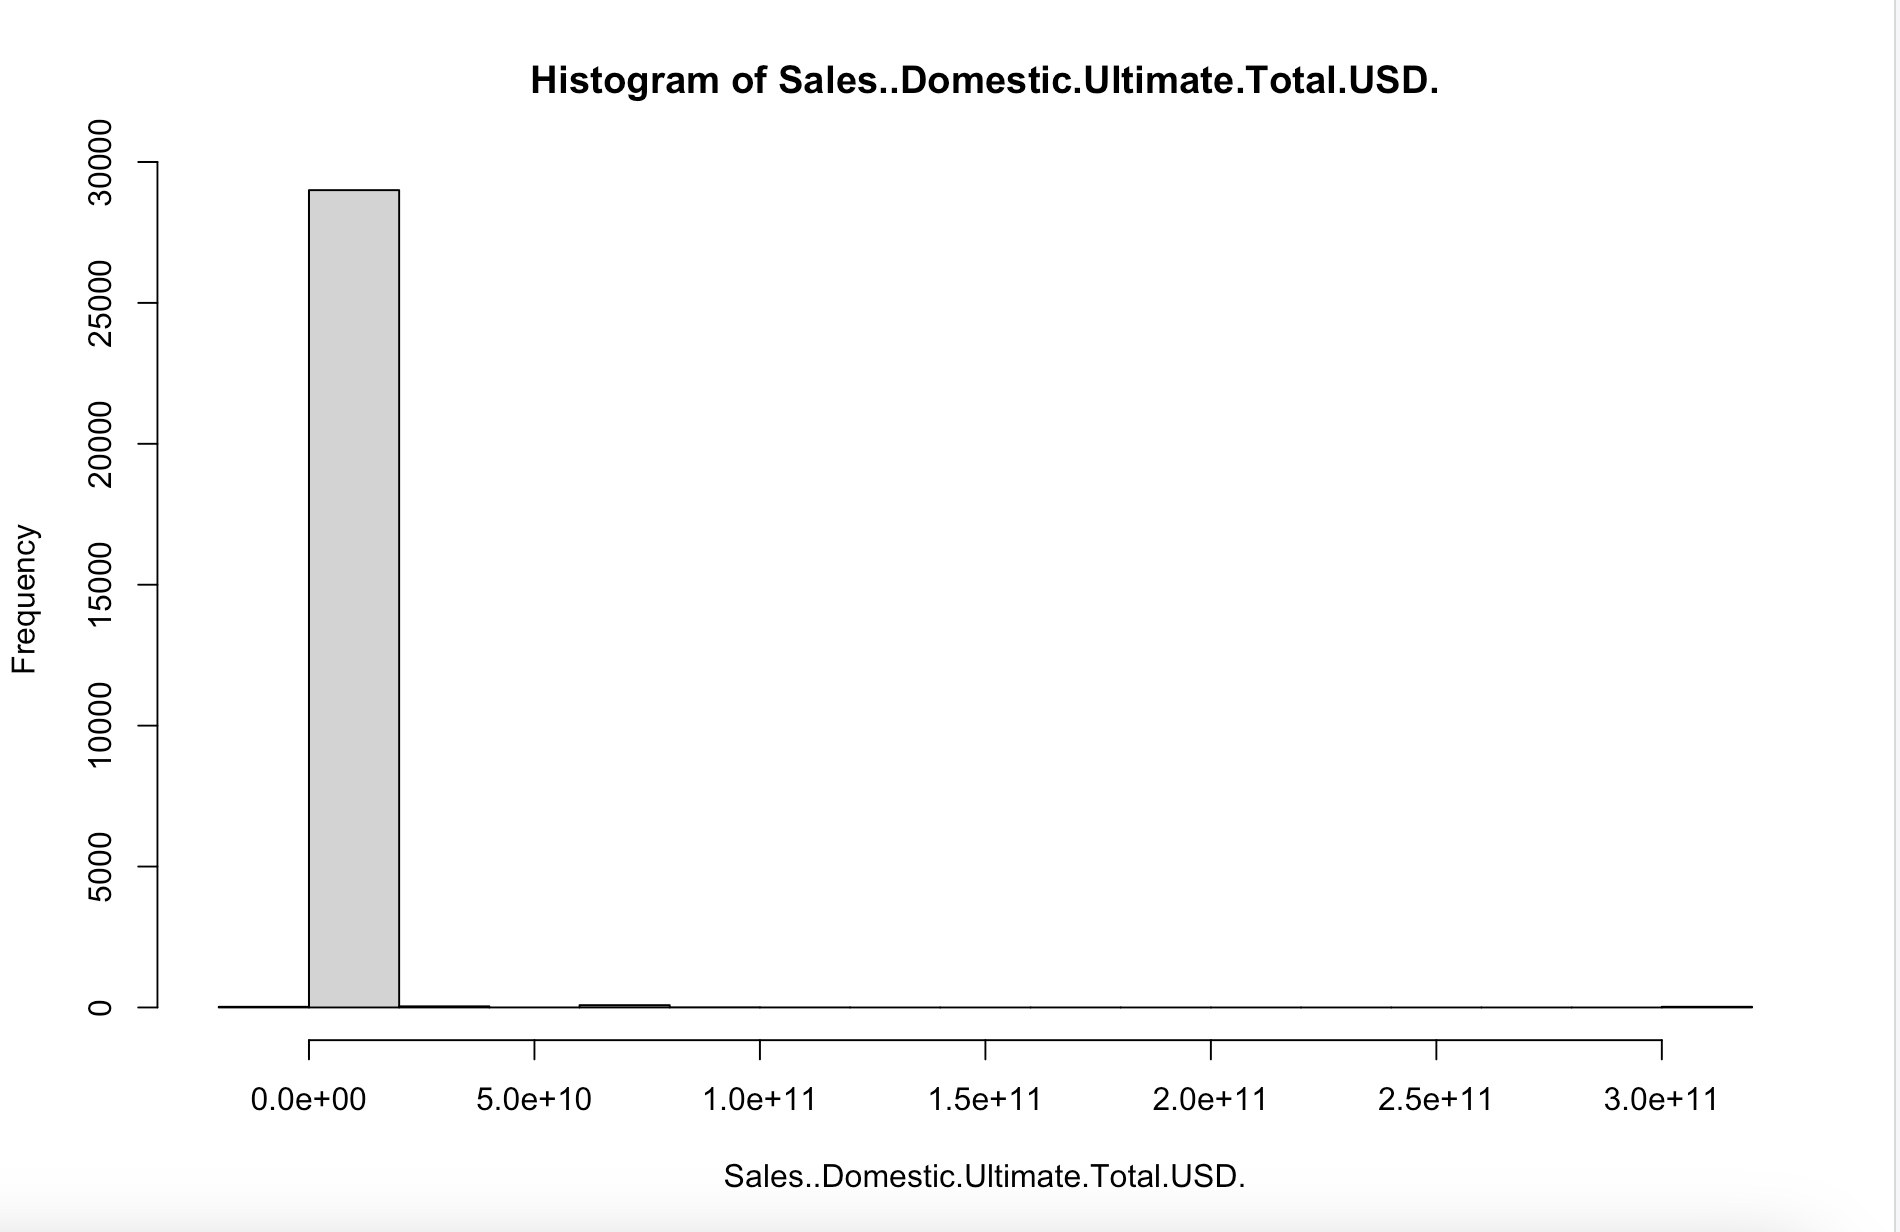

In [ ]:
#Since the range of the sales figures is huge, we will apply log to the sales figures
#Also because, the distribution of the the domestic sales figures is not normal.
df3['Log_Sales'] = np.log(df3['Sales (Domestic Ultimate Total USD)'])
df3 = df3[pd.notna(df3['Log_Sales'])]

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Parent_Coun_Is_Singapore', ylabel='Log_Sales'>

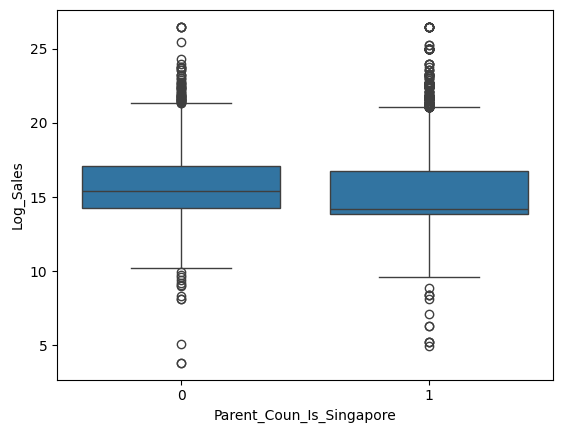

In [ ]:
sns.boxplot(x ="Parent_Coun_Is_Singapore", y='Log_Sales', data=df3)

<Axes: xlabel='Category', ylabel='Log_Sales'>

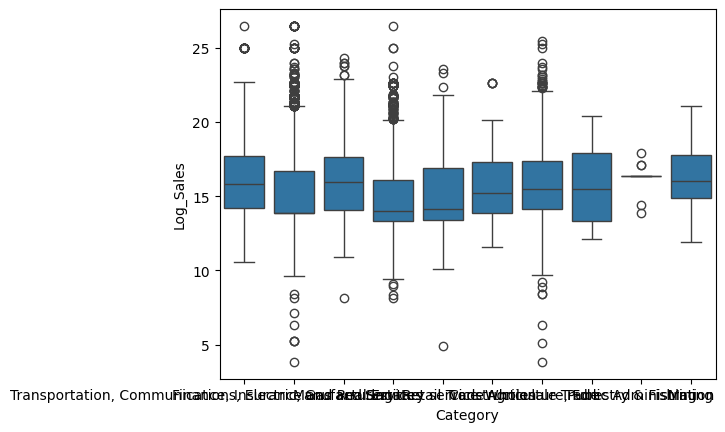

In [ ]:
sns.boxplot(x = 'Category', y = 'Log_Sales', data = df3)

<Axes: xlabel='Glob_Ult_Coun_Is_Singapore', ylabel='Log_Sales'>

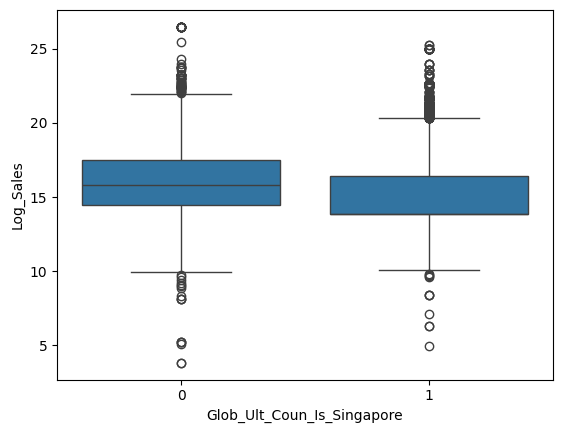

In [ ]:
sns.boxplot(x="Glob_Ult_Coun_Is_Singapore",y= 'Log_Sales', data = df3)

<Axes: xlabel='SIC Code', ylabel='Log_Sales'>

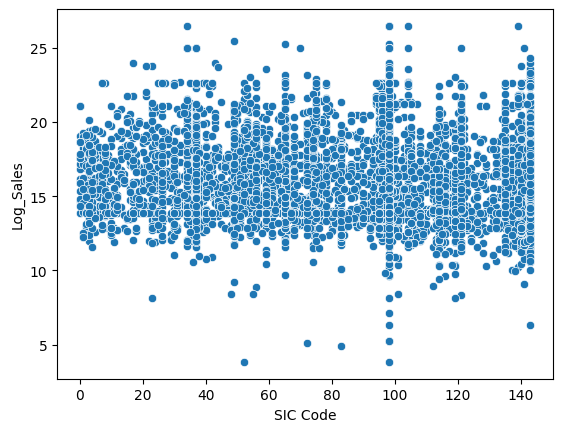

In [ ]:
sns.scatterplot(x ="SIC Code", y= "Log_Sales", data = df3)

(0.0, 4000.0)

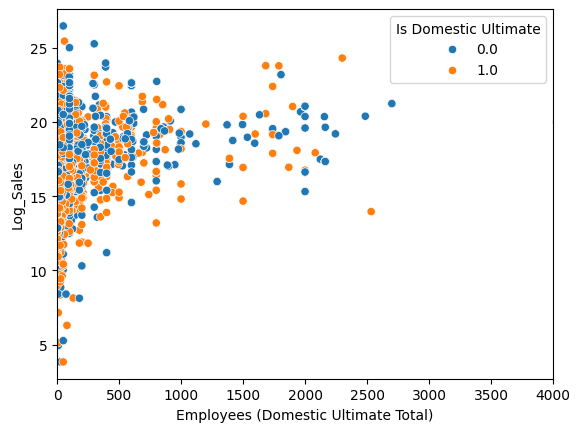

In [ ]:
sns.scatterplot(x = 'Employees (Domestic Ultimate Total)', y = "Log_Sales", hue = "Is Domestic Ultimate", data = df3 )

plt.xlim(0,4000)

(0.0, 500000.0)

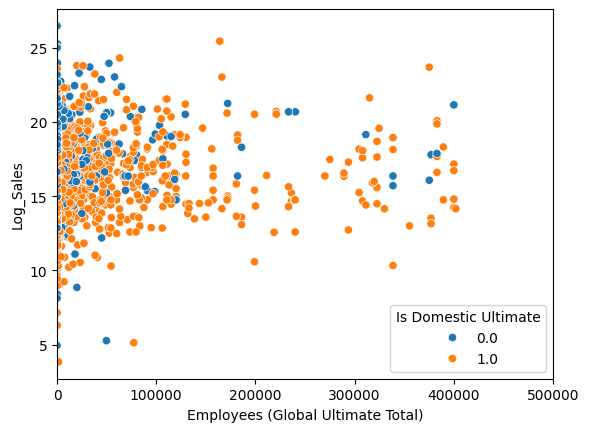

In [ ]:
sns.scatterplot(x = 'Employees (Global Ultimate Total)', y = "Log_Sales", hue = "Is Domestic Ultimate", data = df3 )

plt.xlim(0,0.5*1e6)

<Axes: xlabel='Sales (Global Ultimate Total USD)', ylabel='Log_Sales'>

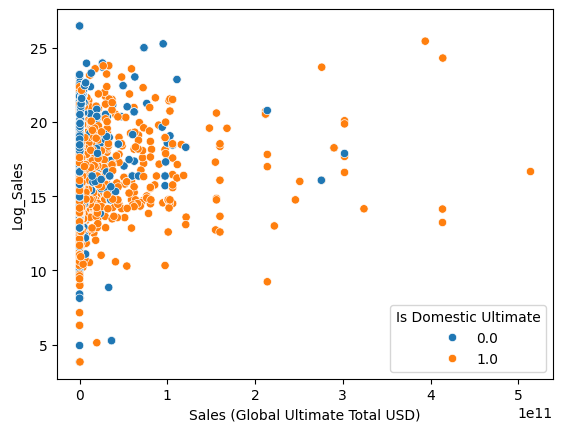

In [ ]:
sns.scatterplot(x= "Sales (Global Ultimate Total USD)", y ="Log_Sales", hue = "Is Domestic Ultimate", data = df3)

##Modelling##

In [ ]:
df3.columns

Index(['LATITUDE', 'LONGITUDE', 'SIC Code',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Is Domestic Ultimate',
       'Is Global Ultimate', 'Entity_Type_Branch', 'Entity_Type_Independent',
       'Entity_Type_Parent', 'Entity_Type_Subsidiary',
       'Ownership_Type_Non-Corporates', 'Ownership_Type_Nonprofit',
       'Ownership_Type_Partnership', 'Ownership_Type_Private',
       'Ownership_Type_Public', 'Ownership_Type_Public Sector',
       'Parent_Coun_Is_Singapore', 'Glob_Ult_Coun_Is_Singapore', 'Company Age',
       'Category', 'Log_Sales'],
      dtype='object')

In [ ]:
#Define X and y for linear regression and random forest model
y = df3["Log_Sales"]

columns_to_drop1 = ["Is Global Ultimate", "Sales (Domestic Ultimate Total USD)","Log_Sales",'LATITUDE', 'LONGITUDE','Entity_Type_Branch', 'Entity_Type_Independent',
       'Entity_Type_Parent', 'Entity_Type_Subsidiary',
       'Ownership_Type_Non-Corporates', 'Ownership_Type_Nonprofit',
       'Ownership_Type_Partnership', 'Ownership_Type_Private',
       'Ownership_Type_Public', 'Ownership_Type_Public Sector',
       'Parent_Coun_Is_Singapore', 'Glob_Ult_Coun_Is_Singapore', "Category",
       'Log_Sales']

X = df3.drop(columns=[col for col in columns_to_drop1 if col in df3.columns], errors='ignore')

#Spilt data set into training set or testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

#X_train: 80% of the data
#X_test: 20% of the data

###Linear regression ###

In [ ]:
#linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#Apply the model to make a predictionn
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
#Model Evaluation
#y_lr_train_pred vs y_lr_train_pred
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
lr_results = pd.DataFrame(["Linear regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]). transpose()
lr_results.columns = ("Methods", "Training MSE", "Training R2", "Test MSE", "Test R2")
lr_results

#The perfomance of thise model is not very satisfactory as seen from the mse values and r^2 values. However, this is expected since the sales figure is not well normally distributed originally.

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,5.540278,0.145782,5.189007,0.132154


###Random Forest###

In [ ]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(X_train, y_train)

#Apply the model to make a predictionn
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame(["Random Forest", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]). transpose()
rf_results.columns = ("Methods", "Training MSE", "Training R2", "Test MSE", "Test R2")
rf_results

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,2.565301,0.604473,2.207926,0.630731


In [ ]:
#Comparing Linear Regression model and Random Forest model
df_models = pd.concat([lr_results, rf_results], axis = 0)
df_models.reset_index(drop = True)

#The random forest model performed better with much higher r^2 value and lower mse value.

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,5.540278,0.145782,5.189007,0.132154
1,Random Forest,2.565301,0.604473,2.207926,0.630731


Text(0.5, 0, 'Experimental y')

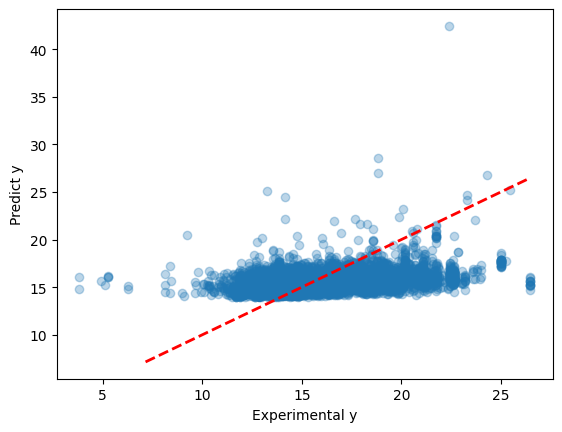

In [ ]:
#Plotting predicted sales figure against actual sales figure for Linear Regression model
import matplotlib.pyplot as plt

plt.scatter(x=y_train, y=y_lr_train_pred, alpha = 0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.ylabel("Predict y")
plt.xlabel("Experimental y")

Text(0.5, 0, 'Experimental y')

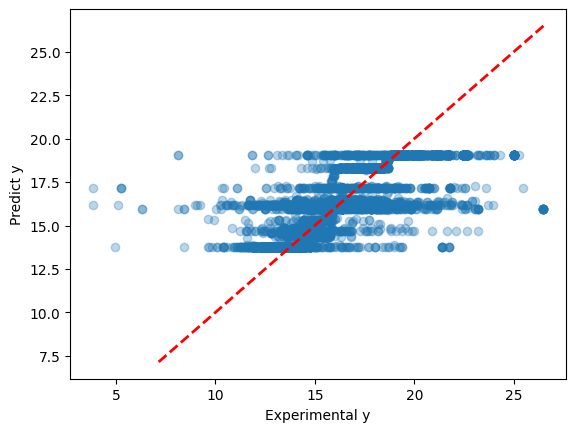

In [ ]:
#Plotting predicted sales figure against actual sales figure for random forest model
import matplotlib.pyplot as plt

plt.scatter(x=y_train, y=y_rf_train_pred, alpha = 0.3)

z = np.polyfit(y_train, y_rf_train_pred, 1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.ylabel("Predict y")
plt.xlabel("Experimental y")

In [ ]:
#The fit for both models is not ideal. We proceeded to look at more complex models.

### Gradient boosting regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Mean Squared Error: 1.1385981232849367
R-squared: 0.8197542489861792


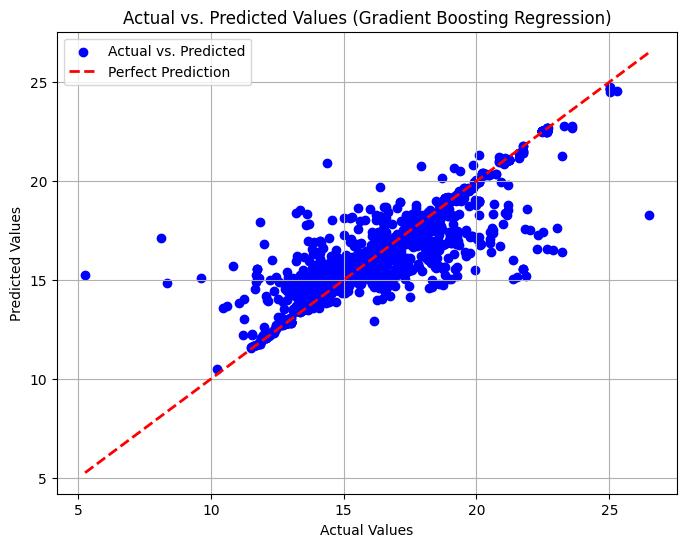

In [ ]:
#Define X and y for Gradient Boosting Regressor
X = df3.iloc[:,[2,3,4,6,19,20]]
#Columns selected are: "SIC Code", "Employees (Domestic Ultimate Total)","Employees (Global Ultimate Total)",
#                       "Sales (Global Ultimate Total USD)" (treated as historical sales to predict current dommestic sales),
#                       "Parent_Coun_Is_Singapore" and "Glob_Ult_Coun_Is_Singapore".
y = df3['Log_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regression model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

# Apply the model to make predictions
y_pred = gb_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

# Scatter plot of actual vs. predicted values for gradient boosting regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Gradient Boosting Regression)')
plt.legend()
plt.grid(True)

plt.show()

#The gradient boosting regressor performed much better than previous models with a mse of 1.28 and a R^2 value of 0.807

###Neural network

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

Epoch 1/100
236/236 [==============================] - 1s 3ms/step - loss: 182.1003 - val_loss: 103.4780
Epoch 2/100
236/236 [==============================] - 0s 2ms/step - loss: 45.8486 - val_loss: 16.3026
Epoch 3/100
236/236 [==============================] - 1s 2ms/step - loss: 12.8196 - val_loss: 10.7435
Epoch 4/100
236/236 [==============================] - 1s 2ms/step - loss: 9.5855 - val_loss: 8.6272
Epoch 5/100
236/236 [==============================] - 0s 2ms/step - loss: 7.6950 - val_loss: 7.2083
Epoch 6/100
236/236 [==============================] - 0s 2ms/step - loss: 6.6083 - val_loss: 6.4834
Epoch 7/100
236/236 [==============================] - 0s 2ms/step - loss: 5.9361 - val_loss: 6.1022
Epoch 8/100
236/236 [==============================] - 1s 2ms/step - loss: 5.7653 - val_loss: 5.9851
Epoch 9/100
236/236 [==============================] - 1s 2ms/step - loss: 5.5742 - val_loss: 5.8947
Epoch 10/100
236/236 [==============================] - 1s 3ms/step - loss: 5.4467 

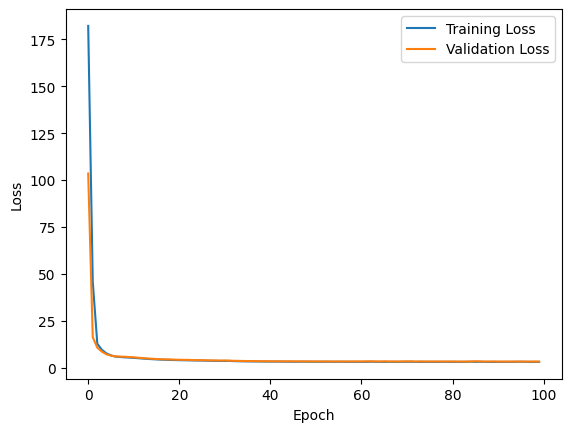

74/74 [==============================] - 0s 1ms/step


In [ ]:
np.random.seed(42)
X = df3[['Employees (Domestic Ultimate Total)', 'Company Age']].values
y = df3[['Log_Sales']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional, but often beneficial for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_dim=2),
    tf.keras.layers.Dense(units=1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test,predictions)
print(f'Mean Squared Error on Test Set: {mse}')
print(f'R^2: {r2}')

Mean Squared Error on Test Set: 3.096364219772503
R^2: 0.5098301298837196


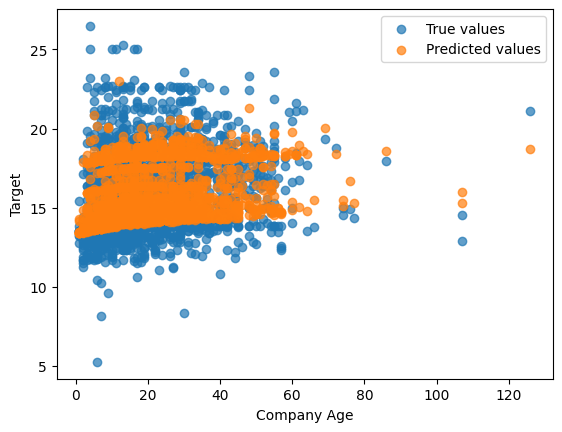

In [ ]:
# Visualize the predictions for company age
plt.scatter(X_test[:, 1], y_test, label='True values', alpha=0.7)
plt.scatter(X_test[:, 1], predictions, label='Predicted values', alpha=0.7)
plt.xlabel('Company Age')
plt.ylabel('Target')
plt.legend()
plt.show()

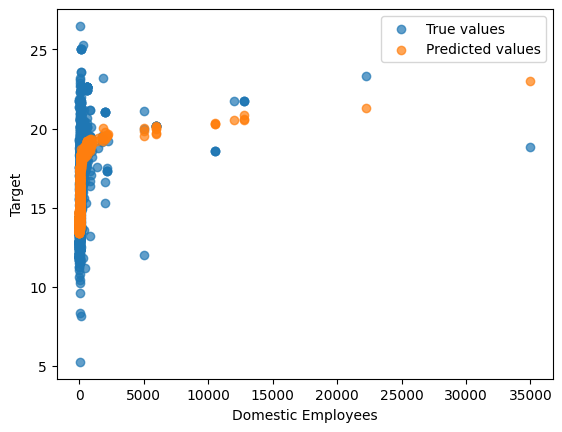

In [ ]:
# Visualize the predictions for domestic employees
plt.scatter(X_test[:, 0], y_test, label='True values', alpha=0.7)
plt.scatter(X_test[:, 0], predictions, label='Predicted values', alpha=0.7)
plt.xlabel("Domestic Employees")
plt.ylabel('Target')
plt.legend()
plt.show()

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list).
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [ ]:
import joblib

# Save the base model to an HDF5 file
joblib.dump(gb_regressor, 'final_model.h5')

['final_model.h5']

In [ ]:
def data_preprocessing(dataframe):
    import pandas as pd
    dataframe = dataframe[dataframe['Company Status (Active/Inactive)'] == 'Active']
    test_data = dataframe.dropna(subset=["LATITUDE", "LONGITUDE", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)", "Year Found" ])
    columns_to_drop = ["AccountID", "Company", "Fiscal Year End", "Industry", "8-Digit SIC Code", "8-Digit SIC Description",
                   "Parent Company", "Company Description", "Square Footage", "Company Status (Active/Inactive)",
                   "Employees (Single Site)", "Import/Export Status", "Global Ultimate Company", "Domestic Ultimate Company"]
    test_data = test_data.drop(columns=[col for col in columns_to_drop if col in test_data.columns], errors='ignore')
    test_data = pd.get_dummies(test_data, columns=['Entity Type'], prefix='Entity_Type')
    test_data = pd.get_dummies(test_data, columns=['Ownership Type'], prefix='Ownership_Type')
    test_data['Parent_Coun_Is_Singapore'] = test_data['Parent Country'].apply(lambda x: 1 if x == 'Singapore' else 0)
    test_data['Glob_Ult_Coun_Is_Singapore'] = test_data['Global Ultimate Country'].apply(lambda x: 1 if x == 'Singapore' else 0)
    test_data['Company Age']  = test_data['Year Found'].apply(lambda x: 2024 - x)
    test_data.drop('Parent Country', axis=1, inplace=True)
    test_data.drop('Global Ultimate Country', axis=1, inplace=True)
    test_data.drop('Year Found', axis=1, inplace=True)
    test_data['Category'] = test_data['SIC Code'].apply(Category)
    sic_code_frequency = test_data['SIC Code'].value_counts()
    threshold = 10
    low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < threshold].index
    test_data['SIC Code'] = test_data['SIC Code'].replace(low_frequency_sic_codes, 'Others')
    test_data['SIC Code'] = test_data['SIC Code'].astype(str)
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    test_data['SIC Code'] = label_encoder.fit_transform(test_data['SIC Code'])
##    test_data['Log_Sales'] = np.log(test_data['Sales (Domestic Ultimate Total USD)'])
##    test_data = test_data[pd.notna(test_data['Log_Sales'])]
    test_data1 = test_data.iloc[:,[2,3,4,6,19,20]]
    return test_data1


In [ ]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    test_data2 = data_preprocessing(hidden_data)

    loaded_model = joblib.load('./final_model.h5')
    result = loaded_model.predict(test_data2.values)
    return result

'''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform.

All relevant code MUST be included in this function.'''

'DO NOT REMOVE THIS FUNCTION.\n\nThe function accepts a dataframe as input and return an iterable (list)\nof binary classes as output.\n\nThe function should be coded to test on hidden data\nand should include any preprocessing functions needed for your model to perform.\n\nAll relevant code MUST be included in this function.'

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

[ 8.3380517  10.24730754  8.34459235 ...  7.97053472  8.01999655
 14.38412814]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!